In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from econml.utilities import hstack 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


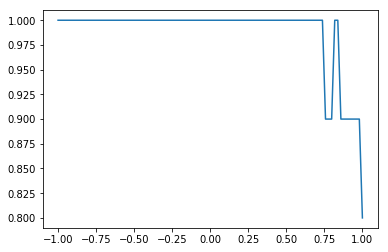

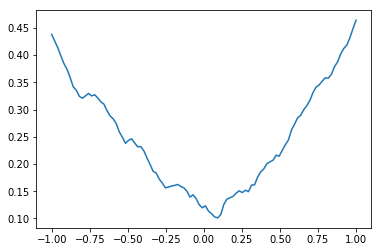

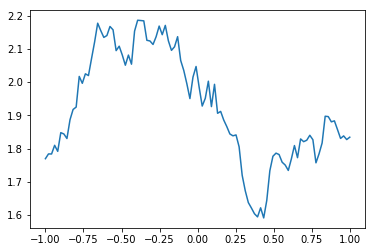

In [26]:
from econml.sklearn_extensions.honestforest import SubsampledHonestForest
n = 1000
d = 10
x_grid = np.linspace(-1, 1, 100)
X_test = np.hstack([x_grid.reshape(-1, 1), np.zeros((100, d-1))])
coverage = []
exp_dict = {'point': [], 'low': [], 'up': []}
for _ in range(100):
    X = np.random.normal(0, 1, size=(n, d))
    y = X[:, 0] + np.random.normal(size=(n,))
    est = SubsampledHonestForest(n_estimators=10000, global_averaging=True, verbose=0)
    est.fit(X, y)
    point = est.predict(X_test)
    low, up = est.predict_interval(X_test, 0.01, 99.9, normal=True)
    coverage.append((low <= x_grid) & (x_grid <= up))
    exp_dict['point'].append(point)
    exp_dict['low'].append(low)
    exp_dict['up'].append(up)

plt.plot(x_grid, np.mean(coverage, axis=0))
plt.show()

plt.plot(x_grid, np.sqrt(np.mean((np.array(exp_dict['point']) - x_grid)**2, axis=0)), label='RMSE')
plt.show()

plt.plot(x_grid, np.mean(np.array(exp_dict['up']) - np.array(exp_dict['low']), axis=0), label='length')
plt.show()

In [18]:
from econml.sklearn_extensions.honestforest import SubsampledHonestForest
n = 100
d = 10
X = np.random.normal(0, 1, size=(n, d))
y = X[:, 0] + np.random.normal(size=(n,))
est = SubsampledHonestForest(n_estimators=10000, global_averaging=True, verbose=1)
est.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   39.2s finished


SubsampledHonestForest(criterion='mse', global_averaging=True, honest=True,
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10000, n_jobs=None, random_state=None,
            subsample_fr=0.8370937333226454, verbose=1, warm_start=False)

In [23]:
point = est.predict(np.hstack([np.linspace(-1, 1, 100).reshape(-1, 1), np.zeros((100, d-1))]))
low, up = est.predict_interval(np.hstack([np.linspace(-1, 1, 100).reshape(-1, 1), np.zeros((100, d-1))]),
                               0.01, 99.9, normal=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    0.6s finished


(100, 100)
(100,)
[0.2305848  0.22798679 0.22818664 0.21494805 0.21562683 0.20979907
 0.21123085 0.21217442 0.21023749 0.2097045  0.20844678 0.20103581
 0.19626513 0.19253021 0.17765786 0.17758259 0.17126835 0.16779765
 0.1682984  0.16625377 0.16471218 0.16498912 0.1646687  0.16454627
 0.1646536  0.16452736 0.16439248 0.1653274  0.16530743 0.16334852
 0.16322125 0.16319715 0.1633416  0.16318605 0.16356138 0.1637366
 0.16388196 0.16437694 0.16425209 0.16394153 0.16350957 0.16246701
 0.16452641 0.16483677 0.16044213 0.16059748 0.1587728  0.15722209
 0.15798464 0.15531214 0.1554503  0.15875624 0.15840565 0.16027826
 0.16248852 0.1625997  0.16240781 0.15985615 0.15804223 0.15914762
 0.15912824 0.15932724 0.15859755 0.15944623 0.1589586  0.1599551
 0.16115299 0.16085268 0.16110715 0.1605271  0.16177788 0.16218033
 0.16184344 0.1619594  0.16256723 0.16250284 0.16247464 0.16454588
 0.16540543 0.16660608 0.16847685 0.16922825 0.16961641 0.18241049
 0.19770989 0.20799927 0.2074654  0.2082181  0

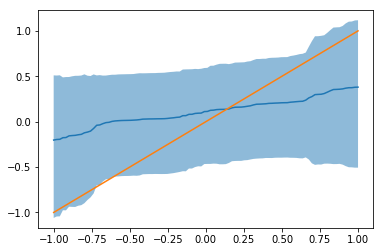

In [24]:
plt.fill_between(np.linspace(-1, 1, 100), low, up, alpha=.5)
plt.plot(np.linspace(-1, 1, 100), point)
plt.plot(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
plt.show()